<CENTER><STRONG><H1>CÓDIGO FINAL<H1></STRONG></CENTER>

## Librerías

In [1]:
### Librerias Estandar ###
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame 
%matplotlib inline

# GREEN ANALYTICS

In [9]:
#### Modelo ####
from sklearn.model_selection import (train_test_split, GridSearchCV)
from sklearn.metrics import (roc_curve, auc, accuracy_score, confusion_matrix)
from sklearn.preprocessing import (LabelEncoder,OneHotEncoder, StandardScaler)  
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from catboost import CatBoostClassifier
import lightgbm as lgb
import xgboost as xgb
#from Auxiliar import feature_selector


In [11]:
#!pip install Auxiliar

## Leer Archivo

In [12]:
#from google.colab import files
#uploaded = files.upload()

In [13]:
data = pd.read_csv('data_train.csv',encoding="latin1", sep = ',')
data.head(35)  

,COD_ALUMNO,SEMESTRE,TIPO_SEMESTRE,CARRERA,SITUACION_MATRICULA,CURSOSAPROBADOS,CURSOSDESAPROBADOS,CURSOSNSP,CREDAPROBADOS,CREDDESAPROBADOS,...,SITUACION_DEUDA_BOLETA_1,SITUACION_DEUDA_BOLETA_2,SITUACION_DEUDA_BOLETA_3,SITUACION_DEUDA_BOLETA_4,SITUACION_DEUDA_BOLETA_5,SITUACION_DEUDA_BOLETA_6,SITUACION_DEUDA_BOLETA_7,SITUACION_DEUDA_BOLETA_8,SITUACION_DEUDA_BOLETA_9,SITUACION_DEUDA_BOLETA_10
0,URP000001,20081,REGULAR CICLO I,Turismo;Hoteleria y Gastronomia,1,2,5,0,6.0,11.0,...,0,0,0,0,0,0,0,0,0,0
1,URP000002,20082,REGULAR CICLO II,Turismo;Hoteleria y Gastronomia,0,0,0,0,0.0,0.0,...,0,1,0,0,0,0,1,0,0,0
2,URP000003,20091,REGULAR CICLO I,Turismo;Hoteleria y Gastronomia,0,0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,URP000004,20092,REGULAR CICLO II,Turismo;Hoteleria y Gastronomia,0,0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,URP000005,20101,REGULAR CICLO I,Turismo;Hoteleria y Gastronomia,0,0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5,URP000006,20102,REGULAR CICLO II,Turismo;Hoteleria y Gastronomia,0,0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
6,URP000007,20111,REGULAR CICLO I,Turismo;Hoteleria y Gastronomia,0,0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7,URP000008,20112,REGULAR CICLO II,Turismo;Hoteleria y Gastronomia,0,0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
8,URP000009,20121,REGULAR CICLO I,Turismo;Hoteleria y Gastronomia,0,0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
9,URP000010,20122,REGULAR CICLO II,Turismo;Hoteleria y Gastronomia,0,0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
data.head(35)

,COD_ALUMNO,SEMESTRE,TIPO_SEMESTRE,CARRERA,SITUACION_MATRICULA,CURSOSAPROBADOS,CURSOSDESAPROBADOS,CURSOSNSP,CREDAPROBADOS,CREDDESAPROBADOS,...,SITUACION_DEUDA_BOLETA_1,SITUACION_DEUDA_BOLETA_2,SITUACION_DEUDA_BOLETA_3,SITUACION_DEUDA_BOLETA_4,SITUACION_DEUDA_BOLETA_5,SITUACION_DEUDA_BOLETA_6,SITUACION_DEUDA_BOLETA_7,SITUACION_DEUDA_BOLETA_8,SITUACION_DEUDA_BOLETA_9,SITUACION_DEUDA_BOLETA_10
0,URP000001,20081,REGULAR CICLO I,Turismo;Hoteleria y Gastronomia,1,2,5,0,6.0,11.0,...,0,0,0,0,0,0,0,0,0,0
1,URP000002,20082,REGULAR CICLO II,Turismo;Hoteleria y Gastronomia,0,0,0,0,0.0,0.0,...,0,1,0,0,0,0,1,0,0,0
2,URP000003,20091,REGULAR CICLO I,Turismo;Hoteleria y Gastronomia,0,0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,URP000004,20092,REGULAR CICLO II,Turismo;Hoteleria y Gastronomia,0,0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,URP000005,20101,REGULAR CICLO I,Turismo;Hoteleria y Gastronomia,0,0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5,URP000006,20102,REGULAR CICLO II,Turismo;Hoteleria y Gastronomia,0,0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
6,URP000007,20111,REGULAR CICLO I,Turismo;Hoteleria y Gastronomia,0,0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7,URP000008,20112,REGULAR CICLO II,Turismo;Hoteleria y Gastronomia,0,0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
8,URP000009,20121,REGULAR CICLO I,Turismo;Hoteleria y Gastronomia,0,0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
9,URP000010,20122,REGULAR CICLO II,Turismo;Hoteleria y Gastronomia,0,0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
data2=data.drop(['SITUACION_DEUDA_BOLETA_1','SITUACION_DEUDA_BOLETA_2','SITUACION_DEUDA_BOLETA_3','SITUACION_DEUDA_BOLETA_4','SITUACION_DEUDA_BOLETA_5','SITUACION_DEUDA_BOLETA_6','SITUACION_DEUDA_BOLETA_7','SITUACION_DEUDA_BOLETA_8','SITUACION_DEUDA_BOLETA_9','SITUACION_DEUDA_BOLETA_10'],axis=1)    
target=[]
for i in range(len(data.COD_ALUMNO)):
    if sum(list(data.iloc[i,117:127]))>=1:
        target.append(1)
    else:
        target.append(0)

In [16]:
data2["Morosidad"]=np.array(target)

In [17]:
data2.head(32)

,COD_ALUMNO,SEMESTRE,TIPO_SEMESTRE,CARRERA,SITUACION_MATRICULA,CURSOSAPROBADOS,CURSOSDESAPROBADOS,CURSOSNSP,CREDAPROBADOS,CREDDESAPROBADOS,...,PERIODOS_DESERTO_ULT_SEM_URP,CARRERA_ACTUAL,PERIODOS_URP_CARRERA_ACTUAL_REGULAR,PERIODOS_URP_CARRERA_ACTUAL,PROVIENE_TRASLADO_INTERNO_CARRERA_ACTUAL,PRIMER_PERIODO_URP_CARRERA_ACTUAL,ULTIMO_PERIODO_URP_CARRERA_ACTUAL,SITUACION_EGRESO,TIPO_BECA,Morosidad
0,URP000001,20081,REGULAR CICLO I,Turismo;Hoteleria y Gastronomia,1,2,5,0,6.0,11.0,...,21,Turismo;Hoteleria y Gastronomia,1.0,0.0,0.0,20081.0,20081.0,NO EGRESO,SIN BECA,0
1,URP000002,20082,REGULAR CICLO II,Turismo;Hoteleria y Gastronomia,0,0,0,0,0.0,0.0,...,21,Turismo;Hoteleria y Gastronomia,1.0,0.0,0.0,20081.0,20081.0,NO EGRESO,SIN BECA,1
2,URP000003,20091,REGULAR CICLO I,Turismo;Hoteleria y Gastronomia,0,0,0,0,0.0,0.0,...,21,Turismo;Hoteleria y Gastronomia,1.0,0.0,0.0,20081.0,20081.0,NO EGRESO,SIN BECA,0
3,URP000004,20092,REGULAR CICLO II,Turismo;Hoteleria y Gastronomia,0,0,0,0,0.0,0.0,...,21,Turismo;Hoteleria y Gastronomia,1.0,0.0,0.0,20081.0,20081.0,NO EGRESO,SIN BECA,0
4,URP000005,20101,REGULAR CICLO I,Turismo;Hoteleria y Gastronomia,0,0,0,0,0.0,0.0,...,21,Turismo;Hoteleria y Gastronomia,1.0,0.0,0.0,20081.0,20081.0,NO EGRESO,SIN BECA,0
5,URP000006,20102,REGULAR CICLO II,Turismo;Hoteleria y Gastronomia,0,0,0,0,0.0,0.0,...,21,Turismo;Hoteleria y Gastronomia,1.0,0.0,0.0,20081.0,20081.0,NO EGRESO,SIN BECA,0
6,URP000007,20111,REGULAR CICLO I,Turismo;Hoteleria y Gastronomia,0,0,0,0,0.0,0.0,...,21,Turismo;Hoteleria y Gastronomia,1.0,0.0,0.0,20081.0,20081.0,NO EGRESO,SIN BECA,0
7,URP000008,20112,REGULAR CICLO II,Turismo;Hoteleria y Gastronomia,0,0,0,0,0.0,0.0,...,21,Turismo;Hoteleria y Gastronomia,1.0,0.0,0.0,20081.0,20081.0,NO EGRESO,SIN BECA,0
8,URP000009,20121,REGULAR CICLO I,Turismo;Hoteleria y Gastronomia,0,0,0,0,0.0,0.0,...,21,Turismo;Hoteleria y Gastronomia,1.0,0.0,0.0,20081.0,20081.0,NO EGRESO,SIN BECA,0
9,URP000010,20122,REGULAR CICLO II,Turismo;Hoteleria y Gastronomia,0,0,0,0,0.0,0.0,...,21,Turismo;Hoteleria y Gastronomia,1.0,0.0,0.0,20081.0,20081.0,NO EGRESO,SIN BECA,0


In [18]:
data2.to_csv("data_target_train.csv",index=None,header=True)

## General - Variable General

<center> <H2> Análisis de Datos</H2></center>

## Verificar la distribucion de los valores Target


In [19]:
pd.value_counts(data2['Morosidad'])

0    163121
1     93094
Name: Morosidad, dtype: int64

In [20]:
# Label Encoding our target variable 
l=LabelEncoder() 
l.fit(data2.Morosidad) 
l.classes_### Muestra los valores categoricos del Target 
l.transform(data2.Morosidad)###Genera un array de la valores de la variable target
data_target=Series(l.transform(data2.Morosidad))  #label encoding our target variable en tipo de Serie
data_target.value_counts() 

0    163121
1     93094
dtype: int64

## Ver grafico de Histograma de la variable Target

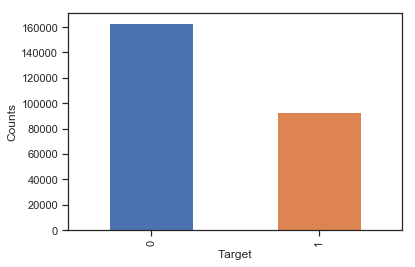

In [21]:
data2["Morosidad"].value_counts().plot.bar()
plt.ylabel("Counts")
plt.xlabel("Target")
plt.show()

## Visualizar tipos de Variables

In [22]:
data.get_dtype_counts()

float64    36
int64      72
object     18
dtype: int64

## Visualizacion de la Data

## Contar valores Faltantes

In [23]:
data2.isna().sum()

COD_ALUMNO                                      0
SEMESTRE                                        0
TIPO_SEMESTRE                                   0
CARRERA                                         0
SITUACION_MATRICULA                             0
CURSOSAPROBADOS                                 0
CURSOSDESAPROBADOS                              0
CURSOSNSP                                       0
CREDAPROBADOS                                   0
CREDDESAPROBADOS                                0
CREDNSP                                         0
PROMEDIOSINNSP                                  0
CRED_OBLIG_MAT                                  0
CRED_ELEC_MAT                                   0
CURSO_MAT_CICLO_01                              0
CURSO_MAT_CICLO_02                              0
CURSO_MAT_CICLO_03                              0
CURSO_MAT_CICLO_04                              0
CURSO_MAT_CICLO_05                              0
CURSO_MAT_CICLO_06                              0


## Eliminar Variables con Valores Faltantes del Mas de 30 %

In [24]:
fila=data2.shape[0]
columna=data2.shape[1]
na=data2.isna().sum()###contar los valores nulos por cada columna
porc=(na/fila)*100
# datanew=np.empty((fila, columna))
data3=pd.DataFrame()
cont=0
for i in range(data2.shape[1]):
    if porc[i]<=30:
        data3[data2.columns[i]]=np.array(data2[data2.columns[i]])
        cont=cont+1
data3.head()

,COD_ALUMNO,SEMESTRE,TIPO_SEMESTRE,CARRERA,SITUACION_MATRICULA,CURSOSAPROBADOS,CURSOSDESAPROBADOS,CURSOSNSP,CREDAPROBADOS,CREDDESAPROBADOS,...,PERIODOS_DESERTO_ULT_SEM_URP,CARRERA_ACTUAL,PERIODOS_URP_CARRERA_ACTUAL_REGULAR,PERIODOS_URP_CARRERA_ACTUAL,PROVIENE_TRASLADO_INTERNO_CARRERA_ACTUAL,PRIMER_PERIODO_URP_CARRERA_ACTUAL,ULTIMO_PERIODO_URP_CARRERA_ACTUAL,SITUACION_EGRESO,TIPO_BECA,Morosidad
0,URP000001,20081,REGULAR CICLO I,Turismo;Hoteleria y Gastronomia,1,2,5,0,6.0,11.0,...,21,Turismo;Hoteleria y Gastronomia,1.0,0.0,0.0,20081.0,20081.0,NO EGRESO,SIN BECA,0
1,URP000002,20082,REGULAR CICLO II,Turismo;Hoteleria y Gastronomia,0,0,0,0,0.0,0.0,...,21,Turismo;Hoteleria y Gastronomia,1.0,0.0,0.0,20081.0,20081.0,NO EGRESO,SIN BECA,1
2,URP000003,20091,REGULAR CICLO I,Turismo;Hoteleria y Gastronomia,0,0,0,0,0.0,0.0,...,21,Turismo;Hoteleria y Gastronomia,1.0,0.0,0.0,20081.0,20081.0,NO EGRESO,SIN BECA,0
3,URP000004,20092,REGULAR CICLO II,Turismo;Hoteleria y Gastronomia,0,0,0,0,0.0,0.0,...,21,Turismo;Hoteleria y Gastronomia,1.0,0.0,0.0,20081.0,20081.0,NO EGRESO,SIN BECA,0
4,URP000005,20101,REGULAR CICLO I,Turismo;Hoteleria y Gastronomia,0,0,0,0,0.0,0.0,...,21,Turismo;Hoteleria y Gastronomia,1.0,0.0,0.0,20081.0,20081.0,NO EGRESO,SIN BECA,0


## Cargar Data Imputada Yisus

In [139]:
data_imp = pd.read_csv('train_to_impute.csv',encoding="latin1", sep = ',')
data_imp.head()

C:\Users\hamil\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3018: DtypeWarning: Columns (84,85) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,COD_ALUMNO,SEMESTRE,TIPO_SEMESTRE,CARRERA,SITUACION_MATRICULA,CURSOSAPROBADOS,CURSOSDESAPROBADOS,CURSOSNSP,CREDAPROBADOS,CREDDESAPROBADOS,...,PERIODOS_DESERTO_ULT_SEM_URP,CARRERA_ACTUAL,PERIODOS_URP_CARRERA_ACTUAL_REGULAR,PERIODOS_URP_CARRERA_ACTUAL,PROVIENE_TRASLADO_INTERNO_CARRERA_ACTUAL,PRIMER_PERIODO_URP_CARRERA_ACTUAL,ULTIMO_PERIODO_URP_CARRERA_ACTUAL,SITUACION_EGRESO,TIPO_BECA,Morosidad
0,URP000001,20081,REGULAR CICLO I,Turismo;Hoteleria y Gastronomia,1,2,5,0,6.0,11.0,...,21,Turismo;Hoteleria y Gastronomia,1.0,0.0,0.0,20081.0,20081.0,NO EGRESO,SIN BECA,0
1,URP000002,20082,REGULAR CICLO II,Turismo;Hoteleria y Gastronomia,0,0,0,0,0.0,0.0,...,21,Turismo;Hoteleria y Gastronomia,1.0,0.0,0.0,20081.0,20081.0,NO EGRESO,SIN BECA,1
2,URP000003,20091,REGULAR CICLO I,Turismo;Hoteleria y Gastronomia,0,0,0,0,0.0,0.0,...,21,Turismo;Hoteleria y Gastronomia,1.0,0.0,0.0,20081.0,20081.0,NO EGRESO,SIN BECA,0
3,URP000004,20092,REGULAR CICLO II,Turismo;Hoteleria y Gastronomia,0,0,0,0,0.0,0.0,...,21,Turismo;Hoteleria y Gastronomia,1.0,0.0,0.0,20081.0,20081.0,NO EGRESO,SIN BECA,0
4,URP000005,20101,REGULAR CICLO I,Turismo;Hoteleria y Gastronomia,0,0,0,0,0.0,0.0,...,21,Turismo;Hoteleria y Gastronomia,1.0,0.0,0.0,20081.0,20081.0,NO EGRESO,SIN BECA,0


##  LLenar Valores Faltantes

In [143]:
## imputacion con la media los valores cuantitativos
data_imp=data_imp.fillna(data_imp.median())
data_imp.isna().sum()

COD_ALUMNO                                      0
SEMESTRE                                        0
TIPO_SEMESTRE                                   0
CARRERA                                         0
SITUACION_MATRICULA                             0
CURSOSAPROBADOS                                 0
CURSOSDESAPROBADOS                              0
CURSOSNSP                                       0
CREDAPROBADOS                                   0
CREDDESAPROBADOS                                0
CREDNSP                                         0
PROMEDIOSINNSP                                  0
CRED_OBLIG_MAT                                  0
CRED_ELEC_MAT                                   0
CURSO_MAT_CICLO_01                              0
CURSO_MAT_CICLO_02                              0
CURSO_MAT_CICLO_03                              0
CURSO_MAT_CICLO_04                              0
CURSO_MAT_CICLO_05                              0
CURSO_MAT_CICLO_06                              0


In [144]:
## imputación para variables categóricas
var_categ=[]
var_cuant=[]
for i in list(data_imp.columns):
    if data_imp[i].dtypes == "O":
        var_categ.append(i)
        data_imp[i].fillna(value=data_imp[i].value_counts().index[0],inplace =True)
    else:
        var_cuant.append(i)
data_imp.isna().sum()

COD_ALUMNO                                  0
SEMESTRE                                    0
TIPO_SEMESTRE                               0
CARRERA                                     0
SITUACION_MATRICULA                         0
CURSOSAPROBADOS                             0
CURSOSDESAPROBADOS                          0
CURSOSNSP                                   0
CREDAPROBADOS                               0
CREDDESAPROBADOS                            0
CREDNSP                                     0
PROMEDIOSINNSP                              0
CRED_OBLIG_MAT                              0
CRED_ELEC_MAT                               0
CURSO_MAT_CICLO_01                          0
CURSO_MAT_CICLO_02                          0
CURSO_MAT_CICLO_03                          0
CURSO_MAT_CICLO_04                          0
CURSO_MAT_CICLO_05                          0
CURSO_MAT_CICLO_06                          0
CURSO_MAT_CICLO_07                          0
CURSO_MAT_CICLO_08                

In [145]:
data_imp.to_csv("data_imputada_train.csv",index=None,header=True)
data_imp.head()

,COD_ALUMNO,SEMESTRE,TIPO_SEMESTRE,CARRERA,SITUACION_MATRICULA,CURSOSAPROBADOS,CURSOSDESAPROBADOS,CURSOSNSP,CREDAPROBADOS,CREDDESAPROBADOS,...,PERIODOS_DESERTO_ULT_SEM_URP,CARRERA_ACTUAL,PERIODOS_URP_CARRERA_ACTUAL_REGULAR,PERIODOS_URP_CARRERA_ACTUAL,PROVIENE_TRASLADO_INTERNO_CARRERA_ACTUAL,PRIMER_PERIODO_URP_CARRERA_ACTUAL,ULTIMO_PERIODO_URP_CARRERA_ACTUAL,SITUACION_EGRESO,TIPO_BECA,Morosidad
0,URP000001,20081,REGULAR CICLO I,Turismo;Hoteleria y Gastronomia,1,2,5,0,6.0,11.0,...,21,Turismo;Hoteleria y Gastronomia,1.0,0.0,0.0,20081.0,20081.0,NO EGRESO,SIN BECA,0
1,URP000002,20082,REGULAR CICLO II,Turismo;Hoteleria y Gastronomia,0,0,0,0,0.0,0.0,...,21,Turismo;Hoteleria y Gastronomia,1.0,0.0,0.0,20081.0,20081.0,NO EGRESO,SIN BECA,1
2,URP000003,20091,REGULAR CICLO I,Turismo;Hoteleria y Gastronomia,0,0,0,0,0.0,0.0,...,21,Turismo;Hoteleria y Gastronomia,1.0,0.0,0.0,20081.0,20081.0,NO EGRESO,SIN BECA,0
3,URP000004,20092,REGULAR CICLO II,Turismo;Hoteleria y Gastronomia,0,0,0,0,0.0,0.0,...,21,Turismo;Hoteleria y Gastronomia,1.0,0.0,0.0,20081.0,20081.0,NO EGRESO,SIN BECA,0
4,URP000005,20101,REGULAR CICLO I,Turismo;Hoteleria y Gastronomia,0,0,0,0,0.0,0.0,...,21,Turismo;Hoteleria y Gastronomia,1.0,0.0,0.0,20081.0,20081.0,NO EGRESO,SIN BECA,0


In [146]:
test_imp = pd.read_csv('test_imputado.csv', sep = ',')
test_imp.head()

,COD_ALUMNO,SEMESTRE,TIPO_SEMESTRE,CARRERA,SITUACION_MATRICULA,CURSOSAPROBADOS,CURSOSDESAPROBADOS,CURSOSNSP,CREDAPROBADOS,CREDDESAPROBADOS,...,PROV_TRASLADO_EXTERNO,PERIODOS_DESERTO_ULT_SEM_URP,CARRERA_ACTUAL,PERIODOS_URP_CARRERA_ACTUAL_REGULAR,PERIODOS_URP_CARRERA_ACTUAL,PROVIENE_TRASLADO_INTERNO_CARRERA_ACTUAL,PRIMER_PERIODO_URP_CARRERA_ACTUAL,ULTIMO_PERIODO_URP_CARRERA_ACTUAL,SITUACION_EGRESO,TIPO_BECA
0,URP000021,20181,REGULAR CICLO I,Turismo;Hoteleria y Gastronomia,0,0,0,0,0.0,0.0,...,0,21,Turismo;Hoteleria y Gastronomia,1,0,0,20081.0,20081.0,NO EGRESO,SIN BECA
1,URP000022,20182,REGULAR CICLO II,Turismo;Hoteleria y Gastronomia,0,0,0,0,0.0,0.0,...,0,21,Turismo;Hoteleria y Gastronomia,1,0,0,20081.0,20081.0,NO EGRESO,SIN BECA
2,URP000058,20181,REGULAR CICLO I,Contabilidad y Finanzas,0,0,0,0,0.0,0.0,...,0,13,Contabilidad y Finanzas,6,4,0,20081.0,20121.0,NO EGRESO,SIN BECA
3,URP000059,20182,REGULAR CICLO II,Contabilidad y Finanzas,0,0,0,0,0.0,0.0,...,0,13,Contabilidad y Finanzas,6,4,0,20081.0,20121.0,NO EGRESO,SIN BECA
4,URP000095,20181,REGULAR CICLO I,Traduccion e Interpretacion,0,0,0,0,0.0,0.0,...,0,0,Traduccion e Interpretacion,13,2,0,20081.0,20182.0,NO EGRESO,SIN BECA


In [ ]:
data_imp.drop(['CPROV_DESCRIPCION','CDIST_DESCRIPCION'], axis=1, inplace=True)
test_imp.drop(['CPROV_DESCRIPCION','CDIST_DESCRIPCION'], axis=1, inplace=True)

In [169]:
data_imp.drop(['COD_ALUMNO'], axis=1, inplace=True)
test_imp.drop(['COD_ALUMNO'], axis=1, inplace=True)

## Codificación de Etiquetas

In [ ]:
for i in var_categ:  
    le = preprocessing.LabelEncoder()
    le.fit(data_imp[i].tolist())   
    aux = le.transform(test_imp[i].tolist())
    train[i] = aux

In [577]:
Train = pd.read_csv('train_final.csv', sep= ',')
Train.head() 

,COD_ALUMNO,SEMESTRE,TIPO_SEMESTRE,CARRERA,SITUACION_MATRICULA,CURSOSAPROBADOS,CURSOSDESAPROBADOS,CURSOSNSP,CREDAPROBADOS,CREDDESAPROBADOS,...,PERIODOS_DESERTO_ULT_SEM_URP,CARRERA_ACTUAL,PERIODOS_URP_CARRERA_ACTUAL_REGULAR,PERIODOS_URP_CARRERA_ACTUAL,PROVIENE_TRASLADO_INTERNO_CARRERA_ACTUAL,PRIMER_PERIODO_URP_CARRERA_ACTUAL,ULTIMO_PERIODO_URP_CARRERA_ACTUAL,SITUACION_EGRESO,TIPO_BECA,Morosidad
0,URP000001,20081,0,17,1,2,5,0,6.0,11.0,...,21,17,1.0,0.0,0.0,20081.0,20081.0,1,15,0
1,URP000002,20082,1,17,0,0,0,0,0.0,0.0,...,21,17,1.0,0.0,0.0,20081.0,20081.0,1,15,1
2,URP000003,20091,0,17,0,0,0,0,0.0,0.0,...,21,17,1.0,0.0,0.0,20081.0,20081.0,1,15,0
3,URP000004,20092,1,17,0,0,0,0,0.0,0.0,...,21,17,1.0,0.0,0.0,20081.0,20081.0,1,15,0
4,URP000005,20101,0,17,0,0,0,0,0.0,0.0,...,21,17,1.0,0.0,0.0,20081.0,20081.0,1,15,0


In [578]:
Test = pd.read_csv('test_final.csv', sep= ',')
Test.head() 

,COD_ALUMNO,SEMESTRE,TIPO_SEMESTRE,CARRERA,SITUACION_MATRICULA,CURSOSAPROBADOS,CURSOSDESAPROBADOS,CURSOSNSP,CREDAPROBADOS,CREDDESAPROBADOS,...,PROV_TRASLADO_EXTERNO,PERIODOS_DESERTO_ULT_SEM_URP,CARRERA_ACTUAL,PERIODOS_URP_CARRERA_ACTUAL_REGULAR,PERIODOS_URP_CARRERA_ACTUAL,PROVIENE_TRASLADO_INTERNO_CARRERA_ACTUAL,PRIMER_PERIODO_URP_CARRERA_ACTUAL,ULTIMO_PERIODO_URP_CARRERA_ACTUAL,SITUACION_EGRESO,TIPO_BECA
0,URP000021,20181,0,17,0,0,0,0,0.0,0.0,...,0,21,17,1,0,0,20081.0,20081.0,1,15
1,URP000022,20182,1,17,0,0,0,0,0.0,0.0,...,0,21,17,1,0,0,20081.0,20081.0,1,15
2,URP000058,20181,0,4,0,0,0,0,0.0,0.0,...,0,13,4,6,4,0,20081.0,20121.0,1,15
3,URP000059,20182,1,4,0,0,0,0,0.0,0.0,...,0,13,4,6,4,0,20081.0,20121.0,1,15
4,URP000095,20181,0,16,0,0,0,0,0.0,0.0,...,0,0,16,13,2,0,20081.0,20182.0,1,15


In [ ]:
fs.record_collinear

## Variables Importantes

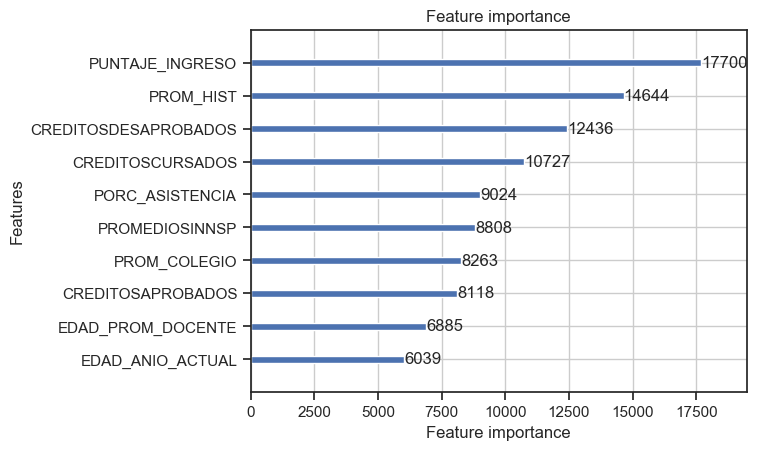

In [719]:
lgb.plot_importance(lg, max_num_features=10)

## Variables X y Y

In [579]:
X = Train.drop(['COD_ALUMNO','Morosidad'],axis=1) 

In [580]:
Y = data_target

## Split Train y Test

In [581]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.3)
print(X_train.shape,X_test.shape) ##XTrain sigue siendo de tipo DataFrame

(179350, 104) (76865, 104)


In [543]:
print(X_train.shape,X_test.shape) ##XTrain sigue siendo de tipo DataFrame

(179350, 121) (76865, 121)


In [504]:
X_train.head()

,SEMESTRE,TIPO_SEMESTRE,SITUACION_MATRICULA,CURSOSAPROBADOS,CURSOSDESAPROBADOS,CURSOSNSP,CREDAPROBADOS,CREDDESAPROBADOS,CREDNSP,PROMEDIOSINNSP,...,8,9,10,11,12,13,14,15,16,17
22238,20111,0,0,0,0,0,0.0,0.0,0.0,0.0000,...,0,0,0,0,0,0,0,0,0,0
194562,20172,1,1,5,1,0,18.0,2.0,0.0,14.0500,...,0,0,0,0,0,0,0,0,1,0
97349,20111,0,1,7,0,0,22.0,0.0,0.0,12.1364,...,0,0,0,0,0,0,0,0,0,0
186829,20131,0,1,4,2,0,14.0,6.0,0.0,9.6000,...,0,0,0,0,0,0,0,0,0,0
78906,20122,1,0,0,0,0,0.0,0.0,0.0,0.0000,...,0,0,0,0,0,0,0,0,0,0


<center> <strong> <h2>Contrucción de Modelos</h2> </strong> </center>

# LIGHT GBM

In [ ]:
train_data=lgb.Dataset(X_train,label = Y_train)

In [ ]:
### 4
param = {'num_leaves':150,'objective':'binary','max_depth':10,'learning_rate':0.1,'max_bin':200}
param['metric'] =['auc','binary_logloss']

In [459]:
### 3
param = {'num_leaves':400,'objective':'binary','max_depth':10,'learning_rate':0.1,'max_bin':200}
param['metric'] =['auc','binary_logloss']

In [587]:
### 3
param = {'num_leaves':200,'objective':'binary','max_depth':20,'learning_rate':0.03,'max_bin':150}
param['metric'] =['auc','binary_logloss']

## Entrenamiento

In [ ]:
num_round=250
from datetime import datetime
start = datetime.now()
lg=lgb.train(param,train_data,num_round)
stop=datetime.now()

In [589]:
execution_time_lg=stop-start
execution_time_lg

datetime.timedelta(0, 68, 535987)

## Prueba

In [644]:
pred_lg = lg.predict(X_test)
pred_lg[1:10]

array([2.68959524e-02, 6.53936409e-01, 4.09250004e-01, 6.51114376e-01,
       2.78082053e-01, 4.82670556e-04, 1.11370654e-04, 4.27566478e-01,
       5.59103942e-01])

In [710]:
pred = lg.predict(X_test)
pred[1:10]

array([2.68959524e-02, 6.53936409e-01, 4.09250004e-01, 6.51114376e-01,
       2.78082053e-01, 4.82670556e-04, 1.11370654e-04, 4.27566478e-01,
       5.59103942e-01])

In [649]:
Final={'Score':pred_lg,
      'TargetReal':data_target}

In [652]:
Resultado=pd.DataFrame(Final)
Resultado.tail()

,Score,TargetReal
256210,0.435260,1
256211,0.875029,1
256212,0.287634,0
256213,0.177723,0
256214,0.362324,0


In [656]:
pred_lg[pred_lg>=0.5]=1
pred_lg[pred_lg<0.5]=0
pred_lg[1:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [705]:
vamos=df.iloc[0:51243,:]
vamos.head()

,Score,TargetReal
22910,0.000002,0
41440,0.000002,0
34384,0.000002,0
21830,0.000002,0
29598,0.000002,0


In [660]:
df=Resultado.sort_values(["Score","TargetReal"], ascending=[True, True])
df.shape

,Score,TargetReal
22910,0.000002,0
41440,0.000002,0
34384,0.000002,0
21830,0.000002,0
29598,0.000002,0
28091,0.000003,0
22058,0.000003,0
28591,0.000003,0
3055,0.000003,0
23571,0.000003,0


## Metricas para evaluar la precision del modelo

### Accuracy

In [646]:
accuracy_lg=accuracy_score(Y_test,pred_lg)
accuracy_lg

0.8265790671957328

### Matriz de Confusion

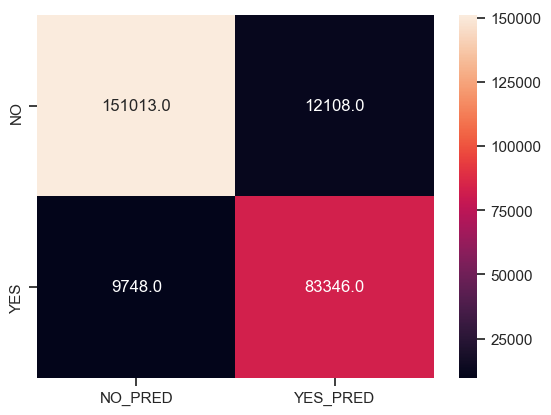

In [657]:
conf = confusion_matrix(data_target, pred_lg, labels = [0,1])
label_y = ['NO','YES']
label_x = ['NO_PRED', 'YES_PRED']
sns.heatmap(conf, annot=True, xticklabels=label_x, yticklabels=label_y,fmt=".1f")

### AUC(Area Bajo la Curva)

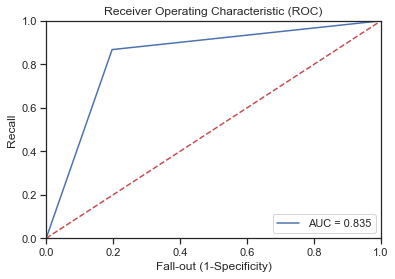

AUC score: 0.8354039200937218


In [611]:
plt.figure()
false_positive_rate, recall, thresholds = roc_curve(Y_test, pred_lg)
roc_auc_lg = auc(false_positive_rate, recall)
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc_lg)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.ylabel('Recall')
plt.xlabel('Fall-out (1-Specificity)')
plt.show()
print('AUC score:', roc_auc_lg)

### Indice de GINI

In [604]:
gini_lg=(roc_auc_lg - 0.5) * 2
gini_lg

0.668942855882392

## Prediccion con el Test

In [571]:
Test.head()

,COD_ALUMNO,SEMESTRE,TIPO_SEMESTRE,SITUACION_MATRICULA,CURSOSAPROBADOS,CURSOSDESAPROBADOS,CURSOSNSP,CREDAPROBADOS,CREDDESAPROBADOS,CREDNSP,...,8,9,10,11,12,13,14,15,16,17
0,URP000021,20181,0,0,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,URP000022,20182,1,0,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,URP000058,20181,0,0,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,URP000059,20182,1,0,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,URP000095,20181,0,0,0,0,0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0


In [612]:
pred_lgFin = lg.predict(Test.iloc[:,1:])
pred_lgFin[1:10]

array([5.21060227e-06, 2.25200414e-04, 1.65259438e-04, 2.51430394e-03,
       8.89935354e-01, 5.98988638e-06, 5.27896569e-06, 3.14262301e-03,
       4.12203573e-03])

In [613]:
pred_lgFin[pred_lgFin>=0.43]=1
pred_lgFin[pred_lgFin<0.43]=0
pred_lgFin[1:10]

array([0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [614]:
PredLG={'COD_ALUMNO':Test.COD_ALUMNO,
     'Morosidad':pred_lgFin.astype(int)}

In [615]:
PredLG=pd.DataFrame(PredLG)
PredLG.tail()

,COD_ALUMNO,Morosidad
44067,URP330728,1
44068,URP330729,1
44069,URP330730,0
44070,URP330731,1
44071,URP330732,0


In [616]:
PredLG.to_csv('PredLG.csv',index=None, header=True)